<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week4/ML_4_1_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In a neural network, the process of each node is similar to what happens in regression!

<center><img src='https://drive.google.com/uc?id=1AxKd0byAmswQr1SKc2dP4-xvIb38RR2V' height=400/></center>


#Multi Layerd Percepron (MLP) Using Keras

In [ ]:
import numpy as np
import pylab as plt

In [ ]:
plt.style.use ('seaborn')

## Work With 1D Data

### Load MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
mnist.load_data()[1][0].shape 

11501568/11490434 [==============================] - 0s 0us/step


(10000, 28, 28)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (f'The train dataset has shape {X_train.shape} and the labels shape is: {y_train.shape}')
print (f'The test dataset has shape {X_test.shape} and the labels shape is: {y_test.shape}')

The train dataset has shape (60000, 28, 28) and the labels shape is: (60000,)
The test dataset has shape (10000, 28, 28) and the labels shape is: (10000,)


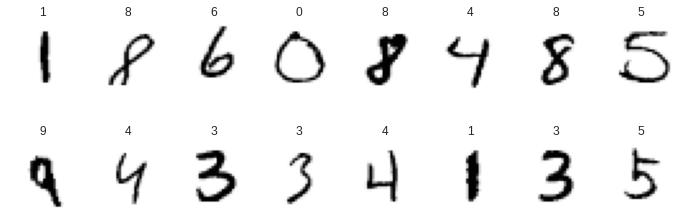

In [ ]:
# plot some of the data with their labels as titles:
fig, ax= plt.subplots (2, 8, figsize= [12,4])
for i in range (2):
    for j in range (8):
        rnd= np.random.randint (len(X_train))
        ax[i, j].imshow (X_train[rnd])
        ax[i, j].set_title (y_train [rnd])
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])
        ax[i, j].grid ()

In [ ]:
X_train[105]

In [ ]:
y_train[105]

1

### Data Preprocessing

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / np.max(X_train)
X_text = X_test / np.max(X_test)

X_train = X_train.reshape ([X_train.shape[0], -1])
X_test = X_test.reshape ([X_test.shape[0], -1])

In [ ]:
np.min(X_train)

0.0

In [ ]:
print (X_train.shape, X_test.shape )

(60000, 784) (10000, 784)


### One-hot Encodeing 

In [ ]:
y_train [10]

3

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train= to_categorical(y_train, num_classes=10, dtype='int')
y_test= to_categorical(y_test, num_classes=10, dtype='int')

## Write a MLP in keras

In [ ]:
y_train[100].shape 

(10,)

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers, regularizers

from tensorflow.keras.utils import plot_model

In [ ]:
X_train.shape[1:]

(784,)

In [ ]:
y_train[100].shape[0]

10

In [ ]:
drpt_rate= 0.2
model= Sequential ([
                    Dense (256, activation= 'relu', kernel_regularizer =regularizers.l1(0.0001), input_shape= X_train.shape[1:]),
                    Dropout(drpt_rate), 
                    Dense (256, activation= 'relu', kernel_regularizer =regularizers.l1(0.0001), input_shape= X_train.shape[1:]),
                    Dropout(drpt_rate), 
                    Dense (256, activation= 'relu', kernel_regularizer =regularizers.l1(0.0001), input_shape= X_train.shape[1:]),
                    Dropout(drpt_rate), 
                    Dense (256, activation= 'relu', kernel_regularizer =regularizers.l1(0.0001), input_shape= X_train.shape[1:]),
                    Dropout(drpt_rate), 
                    Dense (10, activation='softmax')
])

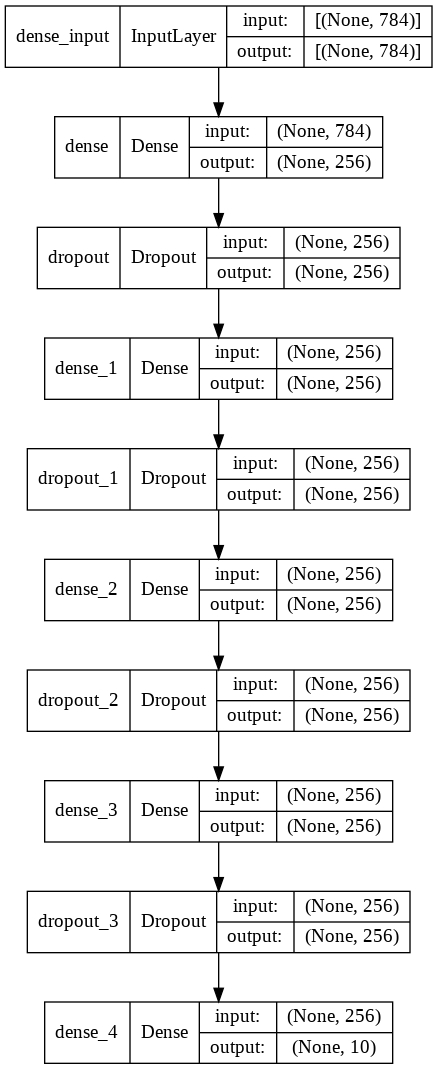

In [ ]:
plot_model (model, show_shapes=True)

In [ ]:
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               6

In [ ]:
sgd = optimizers.SGD()
model.compile (optimizer= sgd, loss= 'CategoricalCrossentropy', metrics= ['accuracy'])

history = model.fit (X_train, y_train, epochs= 10, batch_size= 64, validation_split= 0.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 11s 10ms/step - loss: 3.2744 - accuracy: 0.5291 - val_loss: 2.3028 - val_accuracy: 0.8648
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 2.3812 - accuracy: 0.8195 - val_loss: 2.1136 - val_accuracy: 0.9053
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 2.2123 - accuracy: 0.8665 - val_loss: 2.0264 - val_accuracy: 0.9204
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 2.1136 - accuracy: 0.8900 - val_loss: 1.9669 - val_accuracy: 0.9294
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 2.0367 - accuracy: 0.9061 - val_loss: 1.9137 - val_accuracy: 0.9362
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 1.9782 - accuracy: 0.9150 - val_loss: 1.8691 - val_accuracy: 0.9423
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 1.9258 - accuracy: 0.9231 - val_loss: 1.8267 - val_accuracy: 0.9466
Epoc

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

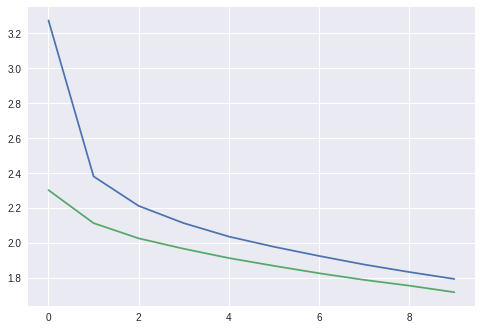

In [ ]:
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])

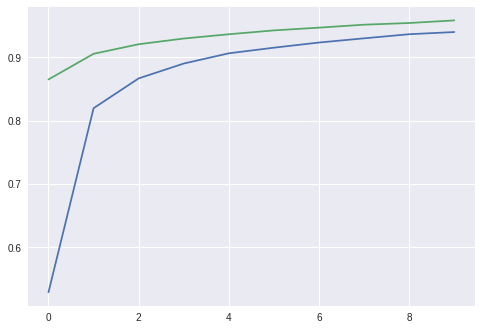

In [ ]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])

In [ ]:
print(y_train [i])
print(np.argmax (y_train [i]))

[0 0 0 1 0 0 0 0 0 0]
3


In [ ]:
np.argmax(model.predict(X_train[:1]))

5

In [ ]:
n= 8
np.argmax (model.predict(X_train[:n]), axis=1)

array([9, 4, 4, 4, 0, 0, 1, 4])

In [ ]:
np.argmax (model.predict(X_train[i:i+1]))

5

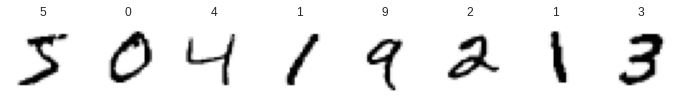

In [ ]:
fig, ax= plt.subplots (1, n, figsize= [12,4])
for i in range (n):
        ax[i].imshow (X_train[i].reshape(28,28))
        # ax[i].set_title (np.argmax (y_train [i]))
        ax[i].set_title (np.argmax (model.predict(X_train[i:i+1])))
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
        ax[i].grid ()

### Evaluate mdoel